# HR Analytics: Job Change of Data Scientists
Predict who will move to a new job

# Problem Statement
A company which is active in Big Data and Data Science wants to hire data scientists among people who successfully pass some courses which was conducted by the company. Many people signup for their training. Company wants to know which of these candidates really wants to work for the company after training or looking for a new employment because it helps to reduce the cost and time as well as the quality of training or planning the courses and categorization of candidates.

Using the demographics, education, relevant experience data, predict the probability of a candidate to look for a new job or will work for the company using machine learning techniques, as well as interpreting affected factors on employee decision.

# Importing libraries

In [1]:
import csv
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Read the Dataset

In [2]:
# Load the dataset into a Python environment
with open('aug_train.csv', 'r') as f: # opens csv file in readmode
    reader = csv.reader(f) # contents are read in a csv reader object
    data = list(reader) # reader object converts the data into list of rows 
print(data)

[['enrollee_id', 'city', 'city_development_index', 'gender', 'relevent_experience', 'enrolled_university', 'education_level', 'major_discipline', 'experience', 'company_size', 'company_type', 'last_new_job', 'training_hours', 'target'], ['8949', 'city_103', '0.92', 'Male', 'Has relevent experience', 'no_enrollment', 'Graduate', 'STEM', '>20', '', '', '1', '36', '1.0'], ['29725', 'city_40', '0.7759999999999999', 'Male', 'No relevent experience', 'no_enrollment', 'Graduate', 'STEM', '15', '50-99', 'Pvt Ltd', '>4', '47', '0.0'], ['11561', 'city_21', '0.624', '', 'No relevent experience', 'Full time course', 'Graduate', 'STEM', '5', '', '', 'never', '83', '0.0'], ['33241', 'city_115', '0.789', '', 'No relevent experience', '', 'Graduate', 'Business Degree', '<1', '', 'Pvt Ltd', 'never', '52', '1.0'], ['666', 'city_162', '0.767', 'Male', 'Has relevent experience', 'no_enrollment', 'Masters', 'STEM', '>20', '50-99', 'Funded Startup', '4', '8', '0.0'], ['21651', 'city_176', '0.764', '', 'Has 

# Exploratory Data Analysis

# Print first 5 rows of dataset

In [3]:
N = 5  # The number of head rows to print
# Print the first N rows of the data
for row in data[:N]: # slice Notation [:N] indicates to select first N elements of the list
    print(row)

['enrollee_id', 'city', 'city_development_index', 'gender', 'relevent_experience', 'enrolled_university', 'education_level', 'major_discipline', 'experience', 'company_size', 'company_type', 'last_new_job', 'training_hours', 'target']
['8949', 'city_103', '0.92', 'Male', 'Has relevent experience', 'no_enrollment', 'Graduate', 'STEM', '>20', '', '', '1', '36', '1.0']
['29725', 'city_40', '0.7759999999999999', 'Male', 'No relevent experience', 'no_enrollment', 'Graduate', 'STEM', '15', '50-99', 'Pvt Ltd', '>4', '47', '0.0']
['11561', 'city_21', '0.624', '', 'No relevent experience', 'Full time course', 'Graduate', 'STEM', '5', '', '', 'never', '83', '0.0']
['33241', 'city_115', '0.789', '', 'No relevent experience', '', 'Graduate', 'Business Degree', '<1', '', 'Pvt Ltd', 'never', '52', '1.0']


# Print last 5 rows of dataset

In [4]:
N = 5  # The number of tail rows to print
# Print the last N rows of the data
for row in data[-N:]: # slice Notation [-N:] indicates to select last N elements of the list
    print(row)

['7386', 'city_173', '0.878', 'Male', 'No relevent experience', 'no_enrollment', 'Graduate', 'Humanities', '14', '', '', '1', '42', '1.0']
['31398', 'city_103', '0.92', 'Male', 'Has relevent experience', 'no_enrollment', 'Graduate', 'STEM', '14', '', '', '4', '52', '1.0']
['24576', 'city_103', '0.92', 'Male', 'Has relevent experience', 'no_enrollment', 'Graduate', 'STEM', '>20', '50-99', 'Pvt Ltd', '4', '44', '0.0']
['5756', 'city_65', '0.802', 'Male', 'Has relevent experience', 'no_enrollment', 'High School', '', '<1', '500-999', 'Pvt Ltd', '2', '97', '0.0']
['23834', 'city_67', '0.855', '', 'No relevent experience', 'no_enrollment', 'Primary School', '', '2', '', '', '1', '127', '0.0']


# Print datatypes for all the columns

In [5]:
rows = data # data is a list of list where inner list represents a row in a dataset
header_row = rows[0]  # Get the first row as the header
data_rows = rows[1:]  # Get the remaining rows as the data

header_columns = header_row # assigning header_row list to variabe header_columns
num_columns = len(header_columns) # assigning no.of columns to num_columns i.e length of the header_columns list

column_datatypes = [set() for i in range(num_columns)] # creates a list of empty sets, where each set represents the data types 

for row in data_rows: # loop that iterates over each inner list in the data_rows list
    columns = row # assigns the current inner list (i.e., the current row) to the variable columns.
    for i, column in enumerate(columns): # loop that iterates over each element in the current row, along with its index.
        try: #  attempts to cast the current element to a float using the float() function.
            float(column)
            column_datatypes[i].add(float) # if it successfull, float datatype is added to that column
        except ValueError: # if it is not successful, string datatype is added to that column
            column_datatypes[i].add(str)

for i, datatype_set in enumerate(column_datatypes): #loop that iterates over each set in the column_datatypes, along with index.
    column_name = header_columns[i] # assigns the name of the current column to the variable column_name with its index
    if len(datatype_set) == 1: # checks if there is only one possible data type for the current column
        datatype = datatype_set.pop()
        print(f"{column_name}: {datatype.__name__}")
    else:
        print(f"{column_name}: Mixed datatypes")

enrollee_id: float
city: str
city_development_index: float
gender: str
relevent_experience: str
enrolled_university: str
education_level: str
major_discipline: str
experience: Mixed datatypes
company_size: str
company_type: str
last_new_job: Mixed datatypes
training_hours: float
target: float


# Print number of rows and columns

In [6]:
rows = data
num_rows = len(rows) - 1  # Subtract 1 for the header row

header_row = rows[0]
header_columns = header_row
num_columns = len(header_columns)

print(f"Number of rows: {num_rows}")
print(f"Number of columns: {num_columns}")

Number of rows: 19158
Number of columns: 14


# Print count, minimum, maximum, mean, Standard Deviation values for the columns

In [7]:
# to print the description of data set
# Read the CSV file and calculate the summary statistics for each column
with open('aug_train.csv', 'r') as f:
    reader = csv.reader(f)
    header = next(reader)  # next function is used to get the next row of the CSV file, which in this case is the header row.
    data = [[] for _ in range(len(header))] # creates an empty list of lists called data, each element is an empty list.
    for row in reader: # # iterate over each element in the row
        for i in range(len(row)):#index i used to access the corresponding list in data.
            try: # The float function is used to convert each element to a float
                data[i].append(float(row[i])) # resulting value is appended to the corresponding list in data
            except ValueError: # If the element cannot be converted to a float,ValueError exception is raised and ignored.
                pass  # placeholder to indicate that no action should be taken

# Print the summary statistics for each column
for i in range(len(header)): # iterate over each column of the CSV file and for each column
    column_data = data[i] 
    count = len(column_data) # len function is used to get the number of elements in the column
    if count == 0: # if the count is zero (i.e., the column is empty), the loop moves on to the next column 
        continue   # using the continue statement
    minimum = min(column_data) # calculates the minimum value of the current column data by using the min() function.
    maximum = max(column_data) #  calculates the minimum value of the current column data by using the min() function.
    mean = sum(column_data) / count # calculates the mean value of the current column data by adding all the values and dividing by the count.
    variance = sum((x - mean) ** 2 for x in column_data) / count # subtracting the mean from each value, squaring the result, and then taking the average
    std_dev = variance ** 0.5 # calculates the standard deviation of the current column data by taking the square root of the variance.
    print(f"{header[i]}: count={count}, min={minimum}, max={maximum}, mean={mean}, std={std_dev}")

enrollee_id: count=19158, min=1.0, max=33380.0, mean=16875.358179350664, std=9616.041615595499
city_development_index: count=19158, min=0.44799999999999995, max=0.9490000000000001, mean=0.8288480008351684, std=0.12335853722993446
experience: count=15285, min=1.0, max=20.0, mean=8.101799149492967, std=4.934438341730775
last_new_job: count=12993, min=1.0, max=4.0, mean=1.618409913030093, std=0.9320844224885888
training_hours: count=19158, min=1.0, max=336.0, mean=65.36689633573442, std=60.056894452977936
target: count=19158, min=0.0, max=1.0, mean=0.24934753105752167, std=0.43263534276930465


# Check missing values

In [8]:
# Load the dataset into a Python environment
with open('aug_train.csv', 'r') as f:
    reader = csv.reader(f)
    data = list(reader)

# Check for missing values
missing_values = 0 # initializes the 'missing_values' variable to 0

for row in data: # iterates over each row in the 'data' list.
    for value in row: # iterates over each value in the current row
        if value == '' or value== 'NA': # checks if the current value is an empty string or 'NA'
            missing_values += 1 # increments the 'missing_values' counter if the current value is missing

print("Number of missing values:", missing_values)

Number of missing values: 20733


# Remove missing values

In [9]:
# Iterate over each row of the dataset and remove the rows that contain missing values
clean_data = [] #  initializes an empty list 'clean_data' that will be used to store the rows without missing values.
for row in data: # iterates over each row in the 'data' list
    has_missing = False # initializes a boolean variable to False to check if the current row contains missing values
    for value in row: # iterates over each value in the current row
        if value == '' or value== 'NA': # checks if the current value is an empty string or 'NA'
            has_missing = True # sets the 'has_missing' variable to True if the current value is missing
            break # breaks out of the inner loop if a missing value is found in the current row
    if not has_missing: # checks if the 'has_missing' variable is False, if the current row does not contain missing values.
        clean_data.append(row) # appends the current row to the 'clean_data' list if it does not contain missing values

In [10]:
print(clean_data)

[['enrollee_id', 'city', 'city_development_index', 'gender', 'relevent_experience', 'enrolled_university', 'education_level', 'major_discipline', 'experience', 'company_size', 'company_type', 'last_new_job', 'training_hours', 'target'], ['29725', 'city_40', '0.7759999999999999', 'Male', 'No relevent experience', 'no_enrollment', 'Graduate', 'STEM', '15', '50-99', 'Pvt Ltd', '>4', '47', '0.0'], ['666', 'city_162', '0.767', 'Male', 'Has relevent experience', 'no_enrollment', 'Masters', 'STEM', '>20', '50-99', 'Funded Startup', '4', '8', '0.0'], ['402', 'city_46', '0.762', 'Male', 'Has relevent experience', 'no_enrollment', 'Graduate', 'STEM', '13', '<10', 'Pvt Ltd', '>4', '18', '1.0'], ['27107', 'city_103', '0.92', 'Male', 'Has relevent experience', 'no_enrollment', 'Graduate', 'STEM', '7', '50-99', 'Pvt Ltd', '1', '46', '1.0'], ['23853', 'city_103', '0.92', 'Male', 'Has relevent experience', 'no_enrollment', 'Graduate', 'STEM', '5', '5000-9999', 'Pvt Ltd', '1', '108', '0.0'], ['25619', 

# Check Outliers

In [11]:
# Find the columns containing numeric data
numeric_cols = [] # initialize an empty list to store the indices of columns that contain numeric data
for i, value in enumerate(clean_data[0]): # loop through the first row of the cleaned dataset
    try:
        float(value) # converts the value to a float
        numeric_cols.append(i) #  if the value is numeric, we append the index i to the numeric_cols list
    except ValueError:
        pass

# Calculate the mean and standard deviation of each numeric column
col_stats = [] # initialize an empty list to store the mean and standard deviation of each numeric column
for col in numeric_cols: # loop through each numeric column
    values = [float(row[col]) for row in clean_data[1:] if row[col] != ''] # create a list of all the non-missing values in the current column, converting each value to a float.
    mean = sum(values) / len(values) #  calculate the mean of the current column
    variance = sum((x - mean)**2 for x in values) / len(values) # calculate the variance of the current column
    stdev = variance**0.5 # calculate the standard deviation of the current column.
    col_stats.append((mean, stdev)) # append a tuple containing the mean and SD of the current column to the col_stats list

# Check for outliers
outliers = [] # initialize an empty list to store any outliers found in the dataset.

for row in clean_data[1:]: # loop through each row of the cleaned dataset, skipping the first row.
    for col, (mean, stdev) in zip(numeric_cols, col_stats): # loop through each numeric column and its  mean and SD using the zip function
        if row[col] != '': # check if the value in the current column is not missing.
            value = float(row[col]) # convert the value to a float
            if abs(value - mean) > 3 * stdev: # check if the value is more than 3 standard deviations away from the mean.
                outliers.append((row, col, value)) # if the value is an outlier, append a tuple containing the row, column, and value to the outliers list.

if len(outliers) > 0: # check if any outliers were found
    print("Outliers found:") # if outliers were found, print a message indicating this
    for row, col, value in outliers: #  loop through each outlier
        print(f"Row {clean_data.index(row)} Column {col}: {value}") # print the row number, column number, and value of the outlier
else:
    print("No outliers found.") # if outliers were not found, print a message indicating this

No outliers found.


# Visualization

# Count plot

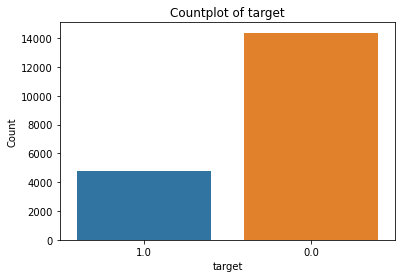

In [12]:
# Extract the 'gender' column from the dataset
target_column = [row[13] for row in data[1:]]

# Create a countplot of the 'gender' column
sns.countplot(x=target_column)
plt.xlabel('target')
plt.ylabel('Count')
plt.title('Countplot of target')
plt.show()

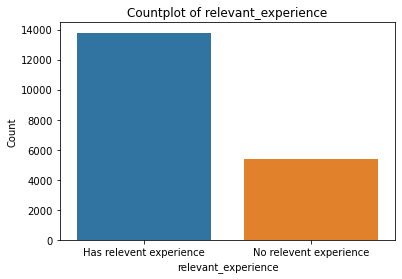

In [13]:
# Extract the 'gender' column from the dataset
relevant_experience_column = [row[4] for row in data[1:]]

# Create a countplot of the 'gender' column
sns.countplot(x=relevant_experience_column)
plt.xlabel('relevant_experience')
plt.ylabel('Count')
plt.title('Countplot of relevant_experience')
plt.show()

# Heatmap

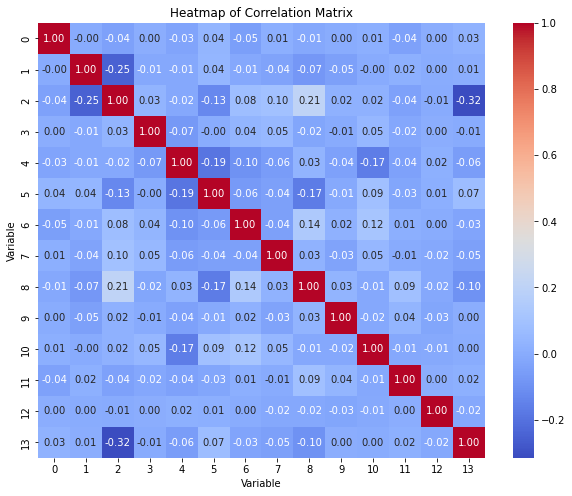

In [14]:
# Assume the 'data' list contains string and float values
numeric_data = [] # initializes an empty list called numeric_data which will later be filled with numerical data
mapping = {} # initializes an empty dictionary called mapping which will be used to map string values to numerical values
counter = 1 #  initializes a counter variable which will be used to assign numerical values to string values.

# Iterate through each row in the data
for row in clean_data: # loops through each row in clean_data
    numeric_row = [] #  initializes an empty list called which will be filled with numerical values for the current row
    for value in row: # loops through each value in the current row
        # If the value is a string and hasn't been mapped yet, map it to a new numerical value
        if isinstance(value, str) and value not in mapping: # checks if the current value is a string and has not been mapped to a numerical value yet
            mapping[value] = counter # If the current value is a new string value, it maps it to a new numerical value
            counter += 1 # The counter is incremented to assign a new numerical value to the next unique string value
        # Convert the value to a numerical value and add it to the list of values for this row
        try: 
            numeric_row.append(float(value)) # If the current value can be converted to a float, it is appended to numeric_row
        except ValueError: # If the current value is a string value that has already been mapped to a numerical value,
            numeric_row.append(mapping[value]) # the numerical value is appended to numeric_row
    numeric_data.append(numeric_row) # numeric_row list is appended to numeric_data

# Convert the numeric data to a NumPy array
numeric_data = np.array(numeric_data) # numeric_data is converted into a NumPy array

# Compute the correlation matrix, The correlation matrix of numeric_data is computed using np.corrcoef() with rowvar=False 
# to indicate that each column represents a variable.
corr_matrix = np.corrcoef(numeric_data, rowvar=False)

# Create a heatmap of the correlation matrix using seaborn
fig, ax = plt.subplots(figsize=(10, 8)) # matplotlib figure and axes are created with a size of 10x8 inches
sns.heatmap(corr_matrix, ax=ax, cmap='coolwarm', annot=True, fmt='.2f') # corr_matrix is created using seaborn with the given colormap, with annotations showing the correlation coefficients rounded to two decimal places.

# Set the plot title and axis labels
ax.set_title('Heatmap of Correlation Matrix')
ax.set_xlabel('Variable')
ax.set_ylabel('Variable')

# Show the plot
plt.show()

# Hist plot

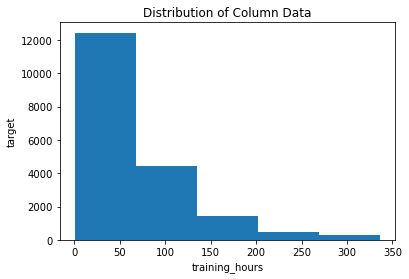

In [15]:
# Load data from file
with open('aug_train.csv', 'r') as f:
    reader = csv.reader(f)
    next(reader)  # Skip the header row
    column_data = [float(row[12]) for row in reader]  

# Plot the histogram of the column data
plt.hist(column_data, bins=5)
plt.xlabel('training_hours')
plt.ylabel('target')
plt.title('Distribution of Column Data')
plt.show()

# Scatter plot

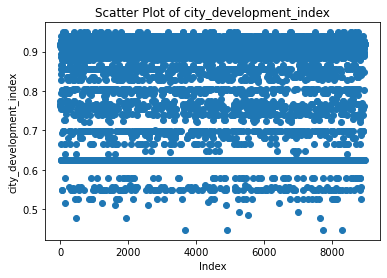

In [66]:
# Assume the 'data' list contains both string and numerical values
x_col_index = 2  # Index of the numerical column

# Extract the values from the column
x_values = [] # initializes an empty list called which will be filled with numerical values from the x_col_index column.
for row in clean_data: # loops through each row in clean_data
    x_value = row[x_col_index] # extracts the value from the x_col_index column for the current row
    # Try to convert the numerical value to a float
    try:
        x_values.append(float(x_value)) # convert the extracted value to a float and append it to the x_values list
    except ValueError: # extracted value cannot be converted to a float, it is ignored and the loop continues to the next row
        pass

# Create a figure and axis object
fig, ax = plt.subplots()

# Create the scatter plot using the values from the column
ax.scatter(range(len(x_values)), x_values)

# Set the plot title and axis labels
ax.set_title('Scatter Plot of {}'.format(clean_data[0][x_col_index]))
ax.set_xlabel('Index')
ax.set_ylabel(clean_data[0][x_col_index])

# Show the plot
plt.show()

# Data Preprocessing

# Converting categorical column values to numerical

# Mapping gender column values to numerical

In [16]:
# define a dictionary to map gender values to numerical codes
gender_map = {'Male': 0, 'Female': 1} 
for i in range(1, len(clean_data)):  # start from index 1 to skip the header row
    gender = clean_data[i][3]  # assume gender column is the fourth column
    if gender in gender_map: # This checks if the gender value is in the gender_map dictionary, and if so
        clean_data[i][3] = gender_map[gender] # replaces the original string value with the corresponding numerical value.

# print the modified data
print(clean_data[:5])

[['enrollee_id', 'city', 'city_development_index', 'gender', 'relevent_experience', 'enrolled_university', 'education_level', 'major_discipline', 'experience', 'company_size', 'company_type', 'last_new_job', 'training_hours', 'target'], ['29725', 'city_40', '0.7759999999999999', 0, 'No relevent experience', 'no_enrollment', 'Graduate', 'STEM', '15', '50-99', 'Pvt Ltd', '>4', '47', '0.0'], ['666', 'city_162', '0.767', 0, 'Has relevent experience', 'no_enrollment', 'Masters', 'STEM', '>20', '50-99', 'Funded Startup', '4', '8', '0.0'], ['402', 'city_46', '0.762', 0, 'Has relevent experience', 'no_enrollment', 'Graduate', 'STEM', '13', '<10', 'Pvt Ltd', '>4', '18', '1.0'], ['27107', 'city_103', '0.92', 0, 'Has relevent experience', 'no_enrollment', 'Graduate', 'STEM', '7', '50-99', 'Pvt Ltd', '1', '46', '1.0']]


# Mapping relevent_experience column values to numerical

In [17]:
# define a dictionary to map relevent_experience values to numerical codes
relevent_experience_map = {'No relevent experience': 0, 'Has relevent experience': 1} 
for i in range(1, len(clean_data)):  # start from index 1 to skip the header row
    relevent_experience = clean_data[i][4]  # assume relevent_experience column is the fifth column
    if relevent_experience in relevent_experience_map: # This checks if the gender value is in the dictionary, and if so
        clean_data[i][4] = relevent_experience_map[relevent_experience] #replaces the original string value with the corresponding numerical value.

# print the modified data
print(clean_data[:5])

[['enrollee_id', 'city', 'city_development_index', 'gender', 'relevent_experience', 'enrolled_university', 'education_level', 'major_discipline', 'experience', 'company_size', 'company_type', 'last_new_job', 'training_hours', 'target'], ['29725', 'city_40', '0.7759999999999999', 0, 0, 'no_enrollment', 'Graduate', 'STEM', '15', '50-99', 'Pvt Ltd', '>4', '47', '0.0'], ['666', 'city_162', '0.767', 0, 1, 'no_enrollment', 'Masters', 'STEM', '>20', '50-99', 'Funded Startup', '4', '8', '0.0'], ['402', 'city_46', '0.762', 0, 1, 'no_enrollment', 'Graduate', 'STEM', '13', '<10', 'Pvt Ltd', '>4', '18', '1.0'], ['27107', 'city_103', '0.92', 0, 1, 'no_enrollment', 'Graduate', 'STEM', '7', '50-99', 'Pvt Ltd', '1', '46', '1.0']]


# Mapping enrolled_university column values to numerical

In [18]:
# define a dictionary to map enrolled_university values to numerical codes
enrolled_university_map = {'no_enrollment': 0, 'Part time course': 1, 'Full time course':2}
for i in range(1, len(clean_data)):  # start from index 1 to skip the header row
    enrolled_university = clean_data[i][5]  # assume gender column is the second column
    if enrolled_university in enrolled_university_map:
        clean_data[i][5] = enrolled_university_map[enrolled_university]

# print the modified data
print(clean_data[:5])

[['enrollee_id', 'city', 'city_development_index', 'gender', 'relevent_experience', 'enrolled_university', 'education_level', 'major_discipline', 'experience', 'company_size', 'company_type', 'last_new_job', 'training_hours', 'target'], ['29725', 'city_40', '0.7759999999999999', 0, 0, 0, 'Graduate', 'STEM', '15', '50-99', 'Pvt Ltd', '>4', '47', '0.0'], ['666', 'city_162', '0.767', 0, 1, 0, 'Masters', 'STEM', '>20', '50-99', 'Funded Startup', '4', '8', '0.0'], ['402', 'city_46', '0.762', 0, 1, 0, 'Graduate', 'STEM', '13', '<10', 'Pvt Ltd', '>4', '18', '1.0'], ['27107', 'city_103', '0.92', 0, 1, 0, 'Graduate', 'STEM', '7', '50-99', 'Pvt Ltd', '1', '46', '1.0']]


# Mapping education_level column values to numerical

In [19]:
# define a dictionary to map education_level values to numerical codes
education_level_map = {'Graduate': 0, 'Masters': 1, 'High School':2, 'Phd':3}
for i in range(1, len(clean_data)):  # start from index 1 to skip the header row
    education_level = clean_data[i][6]  # assume gender column is the second column
    if education_level in education_level_map:
        clean_data[i][6] = education_level_map[education_level]

# print the modified data
print(clean_data[:5])

[['enrollee_id', 'city', 'city_development_index', 'gender', 'relevent_experience', 'enrolled_university', 'education_level', 'major_discipline', 'experience', 'company_size', 'company_type', 'last_new_job', 'training_hours', 'target'], ['29725', 'city_40', '0.7759999999999999', 0, 0, 0, 0, 'STEM', '15', '50-99', 'Pvt Ltd', '>4', '47', '0.0'], ['666', 'city_162', '0.767', 0, 1, 0, 1, 'STEM', '>20', '50-99', 'Funded Startup', '4', '8', '0.0'], ['402', 'city_46', '0.762', 0, 1, 0, 0, 'STEM', '13', '<10', 'Pvt Ltd', '>4', '18', '1.0'], ['27107', 'city_103', '0.92', 0, 1, 0, 0, 'STEM', '7', '50-99', 'Pvt Ltd', '1', '46', '1.0']]


# Mapping major_discipline column values to numerical

In [20]:
# define a dictionary to map major_discipline values to numerical codes
major_discipline_map = {'STEM': 0, 'Business Degree': 1, 'Humanities':2, 'Arts':3, 'No Major':4, 'Other':5}
for i in range(1, len(clean_data)):  # start from index 1 to skip the header row
    major_discipline = clean_data[i][7]  # assume gender column is the second column
    if major_discipline in major_discipline_map:
        clean_data[i][7] = major_discipline_map[major_discipline]

# print the modified data
print(clean_data[:5])

[['enrollee_id', 'city', 'city_development_index', 'gender', 'relevent_experience', 'enrolled_university', 'education_level', 'major_discipline', 'experience', 'company_size', 'company_type', 'last_new_job', 'training_hours', 'target'], ['29725', 'city_40', '0.7759999999999999', 0, 0, 0, 0, 0, '15', '50-99', 'Pvt Ltd', '>4', '47', '0.0'], ['666', 'city_162', '0.767', 0, 1, 0, 1, 0, '>20', '50-99', 'Funded Startup', '4', '8', '0.0'], ['402', 'city_46', '0.762', 0, 1, 0, 0, 0, '13', '<10', 'Pvt Ltd', '>4', '18', '1.0'], ['27107', 'city_103', '0.92', 0, 1, 0, 0, 0, '7', '50-99', 'Pvt Ltd', '1', '46', '1.0']]


# Dropping some columns

In [21]:
# Define the indices of the columns to be dropped
drop_cols = [1, 3, 8, 9, 10, 11] # This defines a list called drop_cols that contains the indices of the columns to be dropped

# Iterate over each row of the dataset and remove the elements in the specified columns
for row in clean_data:
    for index in sorted(drop_cols, reverse=True): # reverse=True argument ensures that the columns are removed from right to left 
        del row[index] # removes the element at the specified index from the current row


In [22]:
print(clean_data[:5])

[['enrollee_id', 'city_development_index', 'relevent_experience', 'enrolled_university', 'education_level', 'major_discipline', 'training_hours', 'target'], ['29725', '0.7759999999999999', 0, 0, 0, 0, '47', '0.0'], ['666', '0.767', 1, 0, 1, 0, '8', '0.0'], ['402', '0.762', 1, 0, 0, 0, '18', '1.0'], ['27107', '0.92', 1, 0, 0, 0, '46', '1.0']]


# Seperate dependent and independent columns

In [23]:
# Separate the header and data rows
header = clean_data[0] # extracts the first row of the clean_data list
rows = clean_data[1:] # extracts all rows of clean_data except for the first row, 

# Extract the indices of the target variable and the remaining features
target_index = len(header) - 1 # sets the target_index variable to the index of the last column
feature_indices = list(range(target_index)) # creates a list of indices for the features, except for the last column

# Separate the dependent and independent variables
X = [] # These create empty lists for the independent feature
y = [] # These create empty lists for the dependent features
for row in rows: # loops through each row in the rows list
    X.append([float(row[i]) for i in feature_indices]) # This extracts the values for the features in the current row, converts them to floats, and appends them to the X list as a nested list.
    y.append(float(row[target_index])) #  extracts the value for the target variable in the current row, converts it to a float, and appends it to the y list

In [24]:
X=np.array(X) # converting X into numpy array
y=np.array(y) # converting y into numpy array

In [25]:
# convert the array to integers using the "unsafe" casting rule
X = X.astype('int64', casting='unsafe')
y = y.astype('int64', casting='unsafe')

In [26]:
print(X)

[[29725     0     0 ...     0     0    47]
 [  666     0     1 ...     1     0     8]
 [  402     0     1 ...     0     0    18]
 ...
 [32313     0     1 ...     0     0    23]
 [29754     0     1 ...     0     2    25]
 [24576     0     1 ...     0     0    44]]


In [27]:
print(y)

[0 0 1 ... 0 0 0]


# Chaid implementation

In [28]:
class Node: # defines a new class called Node.
# defines the constructor method for the class.    
    def __init__(self, feature=None, threshold=None, chi2=None, left=None, right=None, value=None):
        self.feature = feature # assigns the value of the feature to the feature attribute of the instance being created
        self.threshold = threshold # assigns the value of the threshold to the threshold attribute of the instance being created
        self.chi2 = chi2 # assigns the value of the chi2 parameter to the chi2 attribute of the instance being created
        self.left = left # assigns the value of the left parameter to the left attribute of the instance being created
        self.right = right # assigns the value of the right parameter to the right attribute of the instance being created
        self.value = value # assigns the value of the value parameter to the value attribute of the instance being created

In [29]:
class DecisionTree: # class definition for a decision tree
# This is the constructor for the DecisionTree class    
    def __init__(self, alpha=0.05, min_samples=3,max_depth=3):
        self.alpha = alpha # assigns the value of alpha to the alpha attribute of the instance being created
        self.min_samples = min_samples # assigns the value of min_samples to the min_samples attribute of the instance being created
        self.max_depth = max_depth # assigns the value of max_depth to the max_depth attribute of the instance being created
        self.tree = None # nitializes the tree attribute to None.
    
    def fit(self, X, y): # trains the decision tree on the input data X and target labels y
        self.tree = self._build_tree(X, y) # It calls the _build_tree method to construct the decision tree
    
    def predict(self, X): # makes predictions for new data X using the decision tree.takes in a matrix X of new input features
        y_pred = np.zeros(X.shape[0]) #initializes an empty numpy array y_pred of shape (X.shape[0],) to store the predicted values.
        for i, x in enumerate(X): # for loop that iterates over each sample in the input data X
            node = self.tree #  sets the node variable to the root node of the decision tree.
            while node.feature is not None: # loops the decision tree from the root node until a leaf node is reached 
                if x[node.feature] <= node.threshold: # checks if feature value at node for current x sample is <= threshold value
                    node = node.left # If it is, the algorithm moves to the left child node of the current node.
                else:
                    node = node.right # If it is not, the algorithm moves to the right child node of the current node.
            y_pred[i] = node.value # assigns the predicted class value to the y_pred variable for the current sample index i
        return y_pred
    
    def _build_tree(self, X, y): #recursively builds by splitting the data at each node which maximizes the chi2 test statistic.
        if X.shape[0] <= self.min_samples: #checks if the no.of samples in the input feature matrix is <= to the min no.of samples specified by the min_samples parameter
            return Node(value=self._get_leaf_value(y)) #creates a new Node object with the value attribute set to the most frequent class label
        
        # to determine the best feature to split on, the threshold for that feature, and the chi2 score for the split.
        best_feature, best_threshold, best_chi2 = self._get_best_split(X, y)
        if best_feature is None:
            return Node(value=self._get_leaf_value(y)) # the tree is a leaf and a new node with the leaf value is returned
        
        left_mask = X[:, best_feature] <= best_threshold #  creates a Boolean mask left_mask
        right_mask = ~left_mask # Boolean mask right_mask that selects the rows of X that are not selected by left_mask
        left_tree = self._build_tree(X[left_mask], y[left_mask]) # recursively builds the left subtree of the decision tree 
        right_tree = self._build_tree(X[right_mask], y[right_mask]) # recursively builds the right subtree of the decision tree 
        
        return Node(feature=best_feature, threshold=best_threshold, chi2=best_chi2, left=left_tree, right=right_tree)
 
 # This initializes the variables best_feature, best_threshold, and best_chi2 to None, None, and 0,  
    def _get_best_split(self, X, y):
        best_feature = None
        best_threshold = None
        best_chi2 = 0
        
        for feature in range(X.shape[1]): # loop iterates over each feature in the input X
            sorted_X = np.sort(X[:, feature]) # For current feature, it sorts the values in the column of X in ascending order.
            thresholds = (sorted_X[1:] + sorted_X[:-1]) / 2 #thresholds are computed by adding each pair of adjacent sorted values and / the sum by 2.
            for threshold in thresholds: # loop iterates over each threshold in the list of thresholds.
                left_mask = X[:, feature] <= threshold #selects the rows of X where the feature is <= to the threshold,
                right_mask = ~left_mask # selects the rows of X that are not selected by left_mask
                
                if left_mask.sum() < self.min_samples or right_mask.sum() < self.min_samples:
                    continue 
                
                chi2 = self._get_chi2(y, left_mask, right_mask) # get chi2 value for left mask and right mask
                
                if chi2 > best_chi2: # check if chi2 is > for best chi2
                    best_chi2 = chi2 #  store chi2 for best chi2
                    best_feature = feature # store feature value to best feature depending on the chi2 value 
                    best_threshold = threshold # store best threshold value to the variable threshold depending on chi2 value
        
         if best_feature is not None: #  check if best feature is not none
            return best_feature, best_threshold, best_chi2 # display best feature,best feature, best chi2
        else:
            return None, None, None # if it does not satisfy display none
    
    def _get_chi2(self, y, left_mask, right_mask): # calculate chi2 for left mask and right mask
        observed = np.array([
            [np.sum(y[left_mask] == 0), np.sum(y[left_mask] == 1)], #array calculates the no.of samples with class 0 and class 1 
            [np.sum(y[right_mask] == 0), np.sum(y[right_mask] == 1)] # define observed array values for  left mask and right mask
        ])
        expected = np.array([
            [np.sum(left_mask) * np.sum(y == 0), np.sum(left_mask) * np.sum(y == 1)],
            [np.sum(right_mask) * np.sum(y == 0), np.sum(right_mask) * np.sum(y == 1)] # define expected array values
        ]) / y.shape[0] 
        chi2 = np.sum((observed - expected) ** 2 / expected)
        return chi2
    
    def _get_leaf_value(self, y): # is used to calculate the output value of a leaf node of the decision tree
        return np.bincount(y).argmax()# to count the occurrences of each class in the target variable y
    # class with the highest count is returned as the predicted output value for the leaf node.

# Split train and test datasets

In [30]:
def train_test_split(X, y, test_size=0.2, random_state=None):
    if random_state:
        np.random.seed(random_state) # checks whether the random_state parameter is specified
    shuffle_indices = np.random.permutation(len(X)) # shuffles the indices randomly,returns a new array with the shuffled indices.
    test_size = int(test_size * len(X)) #  calculates the number of indices to use for testing based on the test_size parameter 
    test_indices = shuffle_indices[:test_size] # split the shuffled indices into two subsets: one for testing
    train_indices = shuffle_indices[test_size:] # and one for training
    X_train = X[train_indices] # training, testing subsets by selecting the appropriate indices from the original X and y arrays.
    y_train = y[train_indices]
    X_test = X[test_indices]
    y_test = y[test_indices]
    return X_train, X_test, y_train, y_test

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [31]:
X_train.shape

(7164, 7)

In [32]:
y_train.shape

(7164,)

In [33]:
X_test.shape

(1791, 7)

In [34]:
y_test.shape

(1791,)

# Model buiding

In [35]:
classifier = DecisionTree()

In [36]:
np.seterr(divide='ignore', invalid='ignore')

{'divide': 'warn', 'over': 'warn', 'under': 'ignore', 'invalid': 'warn'}

# Fit the Model

In [37]:
classifier.fit(X_train,y_train)

In [38]:
y_pred_train = classifier.predict(X_train)

In [39]:
y_pred_train

array([0., 0., 1., ..., 0., 0., 0.])

In [40]:
correct_predictions = 0 #  keep track of the number of correct predictions made by the model
total_predictions = len(y_train)

for i in range(total_predictions):
    if y_pred_train[i] == y_train[i]:
        correct_predictions += 1 # predicted value is equal to the actual value, this line increments the variable by 1.

accuracy = correct_predictions / total_predictions
print("Training accuracy: ", accuracy)

Training accuracy:  0.9074539363484088


In [41]:
y_pred = classifier.predict(X_test)

In [42]:
y_pred

array([0., 0., 0., ..., 0., 1., 0.])

In [43]:
correct_predictions = 0
total_predictions = len(y_test)

for i in range(total_predictions):
    if y_pred[i] == y_test[i]:
        correct_predictions += 1

accuracy = correct_predictions / total_predictions
print("Testing accuracy: ", accuracy)

Testing accuracy:  0.7615857063093244


# Evaluation metrics

In [44]:
# Calculate TP, FP, FN, TN
TP = np.sum((y_test == 1) & (y_pred == 1))
FP = np.sum((y_test == 0) & (y_pred == 1))
FN = np.sum((y_test == 1) & (y_pred == 0))
TN = np.sum((y_test == 0) & (y_pred == 0))

# Create confusion matrix
confusion_matrix = np.array([[TP, FP], [FN, TN]])
print(confusion_matrix)

# Calculate accuracy, recall, precision, and F-score
accuracy= (TP + TN) / (TP + TN + FP + FN)
recall = TP / (TP + FN)
precision = TP / (TP + FP)
fscore = 2 * (precision * recall) / (precision + recall)

print("Accuracy",accuracy)
print("Recall:", recall)
print("Precision:", precision)
print("F-score:", fscore) 

[[  51  198]
 [ 229 1313]]
Accuracy 0.7615857063093244
Recall: 0.18214285714285713
Precision: 0.20481927710843373
F-score: 0.19281663516068048
